In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

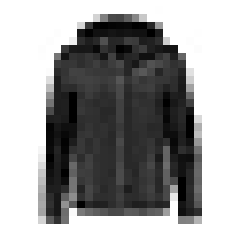

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

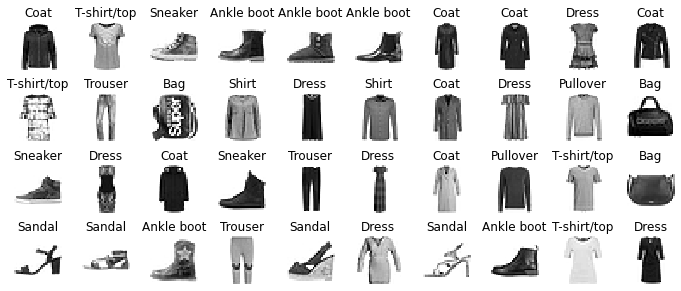

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-05-27 15:12:25.905660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-27 15:12:25.905813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [13]:
weights

array([[-0.03023075, -0.0575783 , -0.00954967, ...,  0.01707353,
        -0.05080394,  0.03039919],
       [-0.05594556, -0.0501955 ,  0.03902177, ...,  0.06310339,
         0.05823036,  0.02002426],
       [-0.03384427,  0.0638098 ,  0.03509748, ..., -0.02273932,
         0.04900513,  0.03330628],
       ...,
       [-0.00677692,  0.04447412,  0.03799324, ...,  0.03317993,
         0.01690114, -0.06676963],
       [ 0.02097186,  0.03880782,  0.03569867, ...,  0.01208708,
         0.00039962,  0.04468236],
       [ 0.0381    , -0.0641228 ,  0.07163946, ...,  0.04622258,
         0.01529388,  0.00439657]], dtype=float32)

In [14]:
print(weights.shape)

(784, 300)


In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.8120

2022-05-27 15:12:49.723983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.5530 - accuracy: 0.8120 - val_loss: 0.4952 - val_accuracy: 0.8336
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4666 - accuracy: 0.8360 - val_loss: 0.4244 - val_accuracy: 0.8556
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4298 - accuracy: 0.8473 - val_loss: 0.5709 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4066 - accuracy: 0.8579 - val_loss: 0.3913 - val_accuracy: 0.8666
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3900 - accuracy: 0.8636 - val_loss: 0.3740 - val_accuracy: 0.8694
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3728 - accuracy: 0.8683 - val_loss: 0.3724 - val_accuracy: 0.8734
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3616 - accuracy: 0.8720 - val_loss: 0.3640 - val_accuracy: 0.8748
Epo

In [19]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [20]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

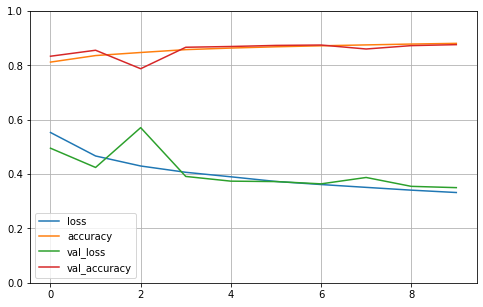

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8610


[0.38324248790740967, 0.8610000610351562]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.04, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [28]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

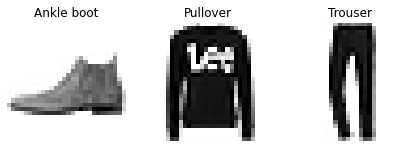

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(300, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(100, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                        

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history2 = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2022-05-27 15:16:29.693117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.0082 - accuracy: 0.6654

2022-05-27 15:16:44.857993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 16s 9ms/step - loss: 1.0082 - accuracy: 0.6654 - val_loss: 0.7104 - val_accuracy: 0.8004
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7040 - accuracy: 0.7570 - val_loss: 0.6063 - val_accuracy: 0.8210
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6340 - accuracy: 0.7792 - val_loss: 0.5643 - val_accuracy: 0.8248
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5877 - accuracy: 0.7928 - val_loss: 0.5286 - val_accuracy: 0.8392
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5617 - accuracy: 0.8017 - val_loss: 0.4949 - val_accuracy: 0.8480
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5388 - accuracy: 0.8077 - val_loss: 0.4743 - val_accuracy: 0.8464
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5214 - accuracy: 0.8146 - val_loss: 0.4611 - val_accuracy: 0.

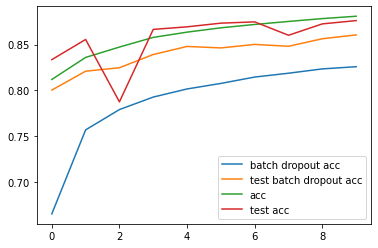

In [40]:
plt.plot(history2.history['accuracy'], label = "batch dropout acc")
plt.plot(history2.history['val_accuracy'], label = "test batch dropout acc")

plt.plot(history.history['accuracy'], label = "acc")
plt.plot(history.history['val_accuracy'], label = "test acc")
plt.legend()
plt.show()

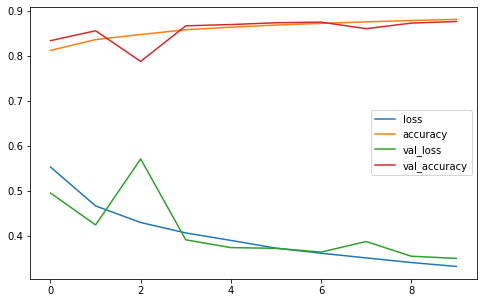

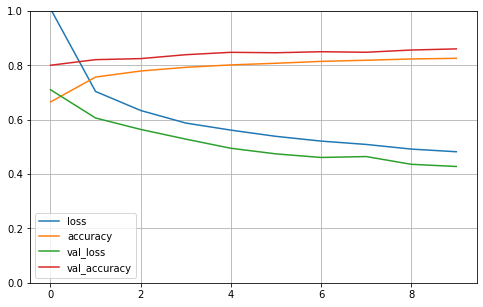

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()